# Numerical Solution to the Van der Pol Oscillator
Raihaan Usman, UROP Student

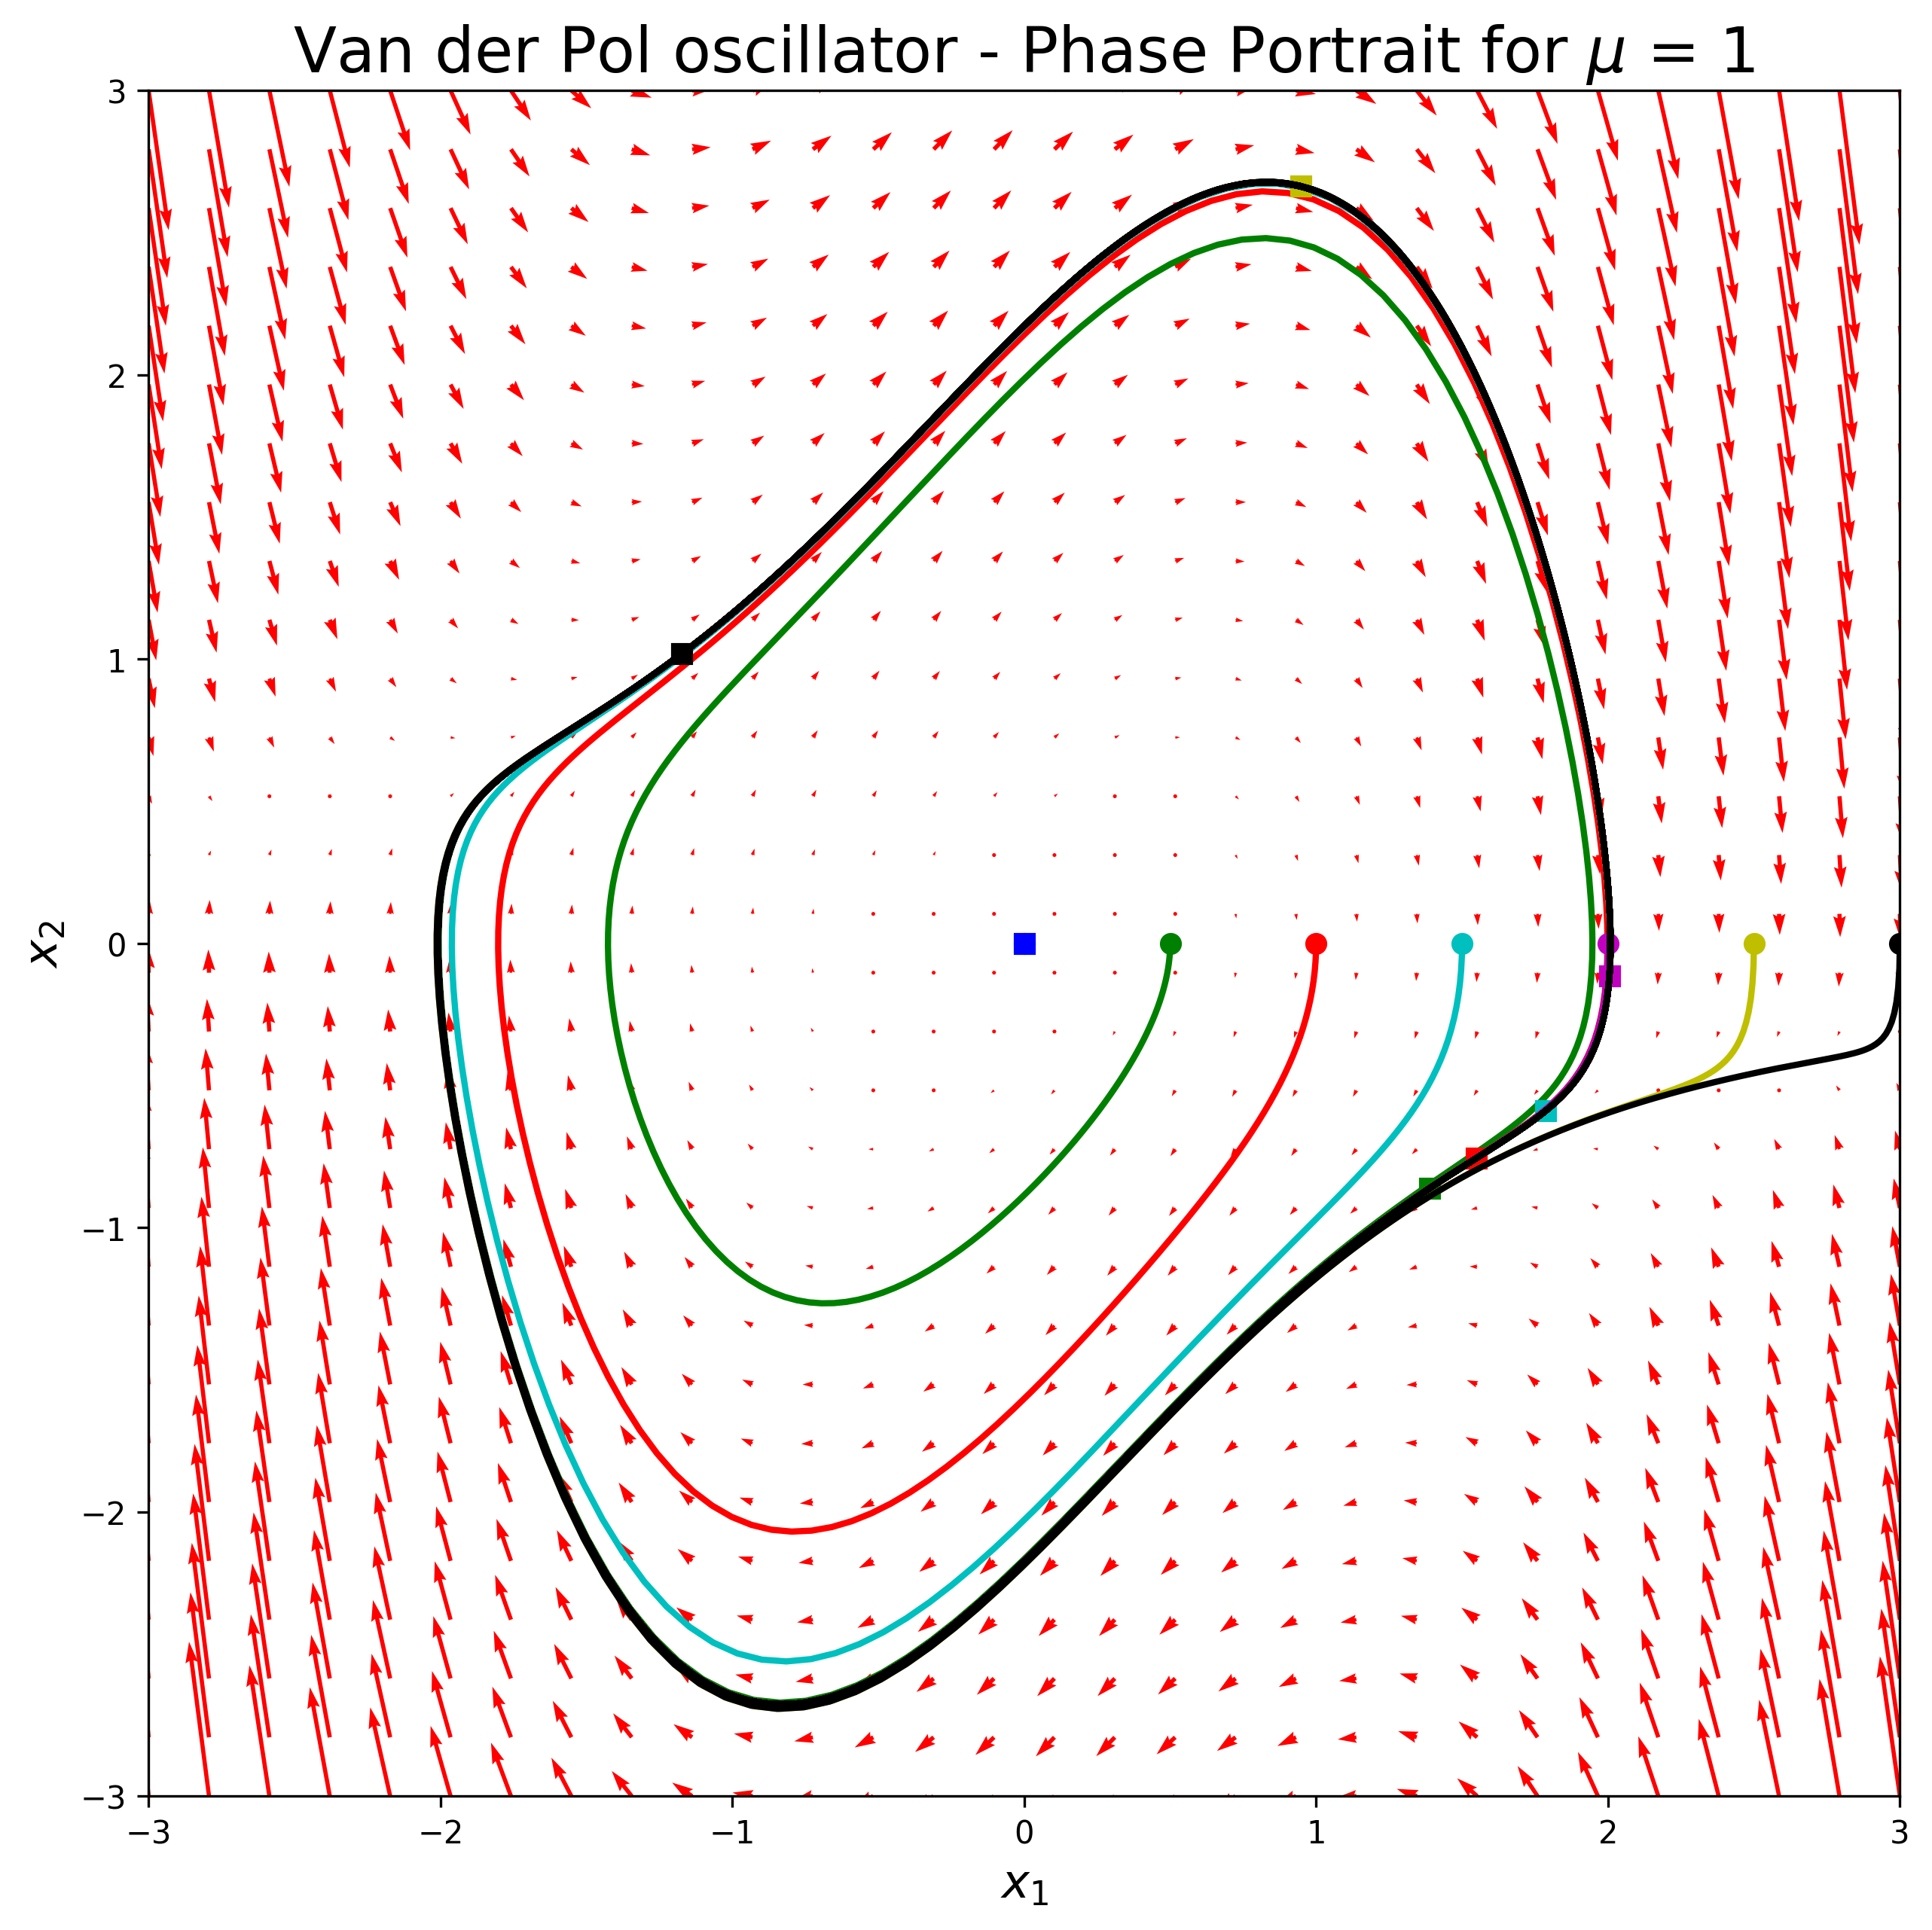

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# Damping coefficient mu
mu = 1

# Function for VdP oscillator
X_dot = lambda X, t: np.array([X[1], mu*(1-X[0]**2)*X[1]-X[0]])

# Generating solution mesh
lim = 3
n_phasors = 30

ax1 = np.linspace(-lim, lim, n_phasors)
ax2 = np.linspace(-lim, lim, n_phasors)
AX1, AX2 = np.meshgrid(ax1, ax2)

# Creating figure with matplotlib
fig = plt.figure(figsize=(10,10), dpi=300)
fig.patch.set_facecolor('white')

plt.title(f"Van der Pol oscillator - Phase Portrait for $\mu$ = {mu}", fontsize=20)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.xlim([-lim, lim])
plt.ylim([-lim, lim])


'''
Phase portrait of the VdP oscillator
'''

# These hold the solutions
x1 = X_dot([AX1, AX2], 0)[0]
x2 = X_dot([AX1, AX2], 0)[1]

plt.quiver(AX1, AX2, x1, x2, color='r')


'''
Particular solution for the VdP oscillator for some initial conditions
'''

# Time vector
t = np.linspace(0, 100, 3000)

# List of matplotlib colors
col = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

# Family of initial conditions
for i, X0_1 in enumerate([0, 0.5, 1, 1.5, 2, 2.5, 3]):
    
    # Initial conditions
    X0 = np.array([X0_1, 0])
    
    # Solving ODE system using LSODA
    x = odeint(X_dot, X0, t)
    
    plt.plot(x[:,0], x[:,1], '-', color=col[i], linewidth=2)
    plt.plot([x[0,0]], [x[0,1]], 'o', color=col[i])      # Start
    plt.plot([x[-1,0]], [x[-1,1]], 's', color=col[i])    # End

# Saving figure
plt.savefig('Figures/phase-portrait.png', bbox_inches='tight')

Success! Note the limit cycle and how its shape changes with the damping parameter $\mu$.